## Import Packages

In [39]:
import matplotlib.pyplot as plt

# Importing the libraries
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell

# Visualising the Test set results
# Visualising the Training set results
from matplotlib.colors import ListedColormap

# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

InteractiveShell.ast_node_interactivity = "all"

# CSV file path
file_path = "./Section 16 - Logistic Regression/Python/Social_Network_Ads.csv"


X_feature_list = [
    2,
    3,
]  # only Column number 2 and 3 are selected as Independent Variables
target = -1  # last colomn

In [40]:
def read_X_y_from_path(file_path, X_feature_list, target):
    """recieve file_path for CSV file and return X for Independent Variables and y for Target or Dependent Variable """
    # Importing the dataset
    dataset = pd.read_csv(file_path)
    X = dataset.iloc[:, X_feature_list].values
    y = dataset.iloc[:, target].values
    return X, y


def scale_it(X):
    """Using Standard Scaler, Scale any give dataset to (-1,1):
    from sklearn.preprocessing import StandardScaler"""
    from sklearn.preprocessing import StandardScaler

    # Feature Scaling
    sc = StandardScaler()
    X = sc.fit_transform(X)
    return X


def build_classifier(classifier):
    """
    Please pass one of the following classifier name as your Classification Model:
    
    LogisticRegression
    KNeighborsClassifier
    naive_bayes
    SVC
    DecisionTreeClassifier
    RandomForestClassifier
    
    
    For example:
    build_classifier(RandomForestClassifier)
    """
    if "LogisticRegression" == classifier:
        classifier = LogisticRegression(random_state=0)
        print(f"the {classifier} model has been built!!!\n")

    elif "KNeighborsClassifier" == classifier:
        from sklearn.neighbors import KNeighborsClassifier

        classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
        print(f"the {classifier} model has been built!!!\n")

    elif "naive_bayes" == classifier:
        from sklearn.naive_bayes import GaussianNB

        classifier = GaussianNB()
        print(f"the {classifier} model has been built!!!\n")

    elif "SVC" == classifier:
        from sklearn.svm import SVC

        classifier = SVC(kernel="rbf", random_state=0)
        print(f"the {classifier} model has been built!!!\n")

    elif "DecisionTreeClassifier" == classifier:
        from sklearn.tree import DecisionTreeClassifier

        classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
        print(f"the {classifier} model has been built!!!\n")

    elif "RandomForestClassifier" == classifier:
        from sklearn.ensemble import RandomForestClassifier

        classifier = RandomForestClassifier(
            n_estimators=10, criterion="entropy", random_state=0
        )
        print(f"the {classifier} model has been built!!!\n")

    classifier.fit(scale_it(X_train), y_train)
    return classifier


def pred(classifier, X_test):
    """Predicting the given (Test) set results"""

    return classifier.predict(scale_it(X_test))


def metrix_plot(
    classifier,
    X_test,
    y_test,
    cmap="Greens",
    simple_CM=False,
    color_confusion_metrix=False,
    ROC_AUC=False,
):
    """Choose to Plot between Simple Confustion Metrix or Colored Confusion Metrix or ROC_AUC"""
    X_test = scale_it(X_test)
    from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve

    # Making the Confusion Matrix
    if simple_CM == True:
        cm = confusion_matrix(y_test, pred(classifier, X_test))
        print(f"Confusion Metrix Results for {classifier} Model:\n", cm)

    # Making the Color Confusion Matrix
    if color_confusion_metrix == True:
        plot_confusion_matrix(classifier, X_test, y_test, cmap="Greens")

    # ROC_AUC
    if ROC_AUC == True:
        plot_roc_curve(classifier, X_test, y_test)


#         plt.show();
def metrix_report(y_test, y_pred):
    from sklearn.metrics import classification_report

    target_names = ["class 0", "class 1"]
    return classification_report(y_test, y_pred, target_names=target_names)


def classification_plot(
    classifier,
    X_train,
    y_train,
    X_lable="Age",
    y_label="Estimated Salary",
    title="Logistic Regression",
):
    """Plot a beutiful scatter plot for two class Classifier data with Green(1) and Red(0)"""

    plt.rcParams["figure.figsize"] = [15, 6]

    X_set, y_set = scale_it(X_train), y_train
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
    )
    plt.contourf(
        X1,
        X2,
        classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.2,
        cmap=ListedColormap(("red", "green")),
    )
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            X_set[y_set == j, 0],
            X_set[y_set == j, 1],
            c=ListedColormap(("red", "green"))(i),
            label=j,
        )
    plt.title(title)
    plt.xlabel(X_lable)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()


# print(scale_it(y_test))
# print(X_train[0],' Become:', scale_it(X_train)[0])

#### ` Metrics and scoring: quantifying the quality of predictions`
https://scikit-learn.org/stable/modules/model_evaluation.html

the RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0) model has been built!!!

Confusion Metrix Results for RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0) Model:
 [[53  5]
 [ 1 21]]


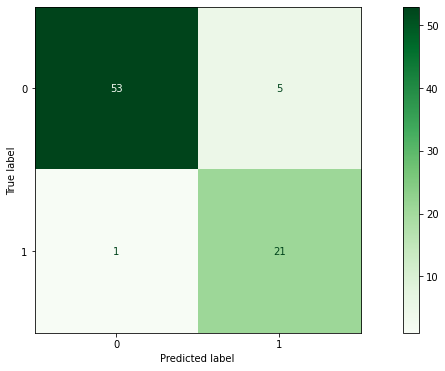

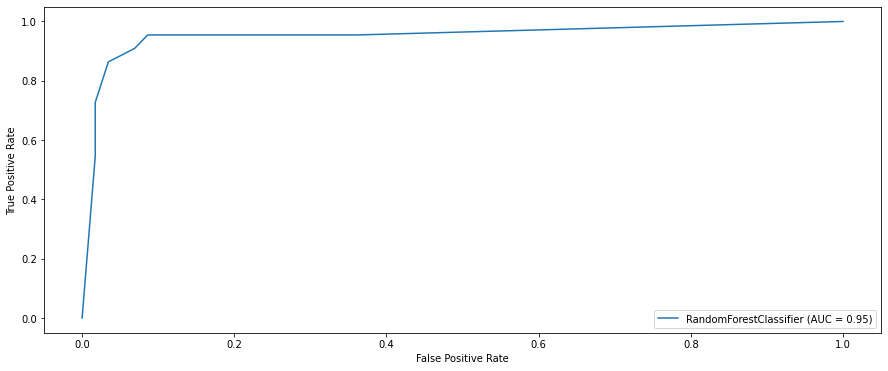

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


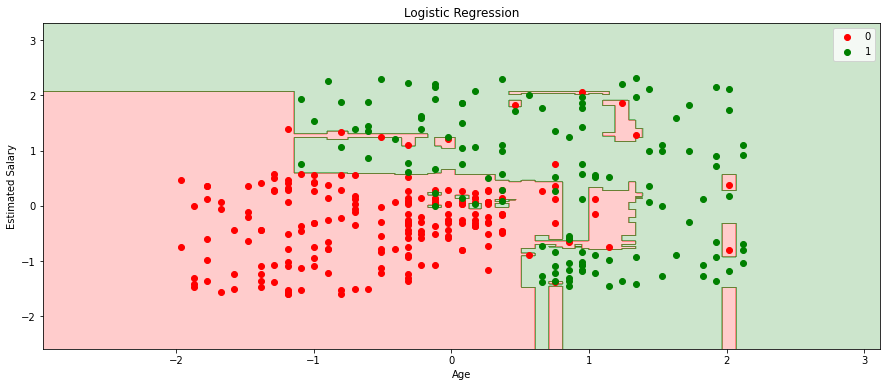

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


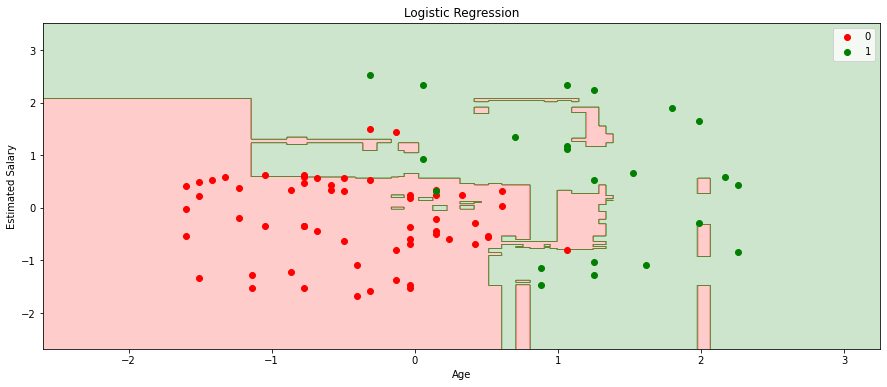

              precision    recall  f1-score   support

     class 0       0.98      0.91      0.95        58
     class 1       0.81      0.95      0.88        22

    accuracy                           0.93        80
   macro avg       0.89      0.93      0.91        80
weighted avg       0.93      0.93      0.93        80



''

''

In [42]:
X, y = read_X_y_from_path(file_path, X_feature_list, target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier_model = build_classifier('RandomForestClassifier')

y_pred = pred(classifier_model, X_test)

metrix_plot(classifier_model, X_test, y_test, simple_CM=True, color_confusion_metrix=True, ROC_AUC=True);
plt.show();
classification_plot(classifier_model, X_train, y_train);
classification_plot(classifier_model, X_test, y_test)
print(metrix_report(y_test, pred(classifier_model, X_test)))
;
;

## Comparing all the Classification module!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

the LogisticRegression(random_state=0) model has been built!!!

Confusion Metrix Results for LogisticRegression(random_state=0) Model:
 [[ 98 451]
 [ 29 313]]
              precision    recall  f1-score   support

     class 0       0.77      0.18      0.29       549
     class 1       0.41      0.92      0.57       342

    accuracy                           0.46       891
   macro avg       0.59      0.55      0.43       891
weighted avg       0.63      0.46      0.40       891

the KNeighborsClassifier() model has been built!!!

Confusion Metrix Results for KNeighborsClassifier() Model:
 [[102 447]
 [ 36 306]]
              precision    recall  f1-score   support

     class 0       0.74      0.19      0.30       549
     class 1       0.41      0.89      0.56       342

    accuracy                           0.46       891
   macro avg       0.57      0.54      0.43       891
weighted avg       0.61      0.46      0.40       891

the GaussianNB() model has been built!!!

Confusion 

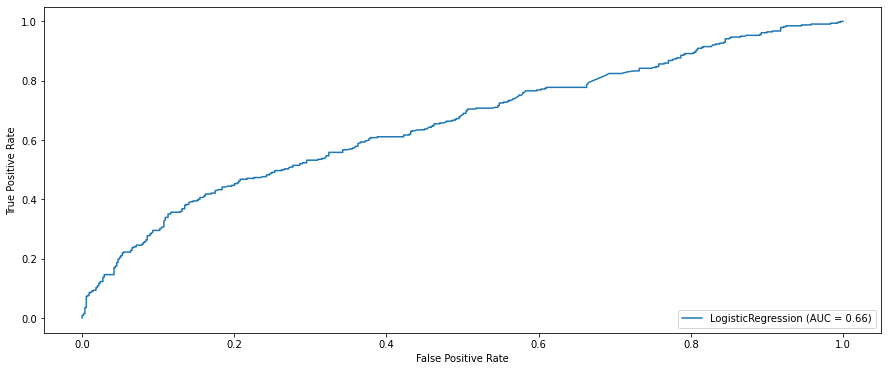

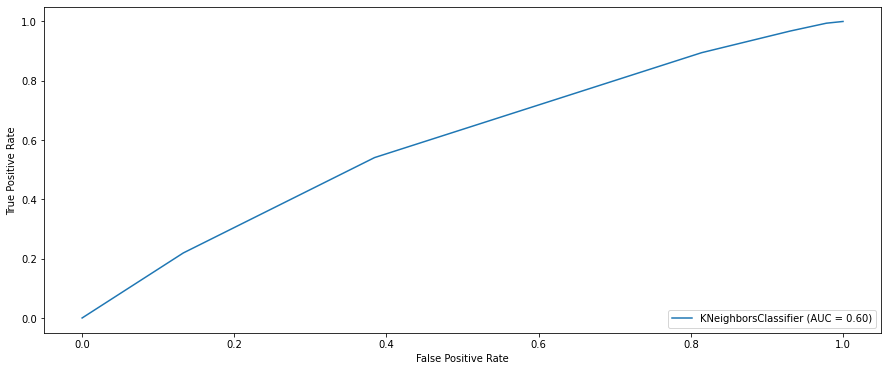

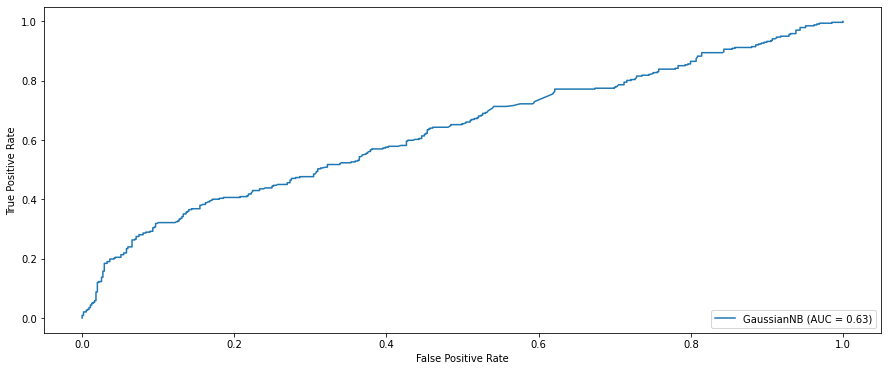

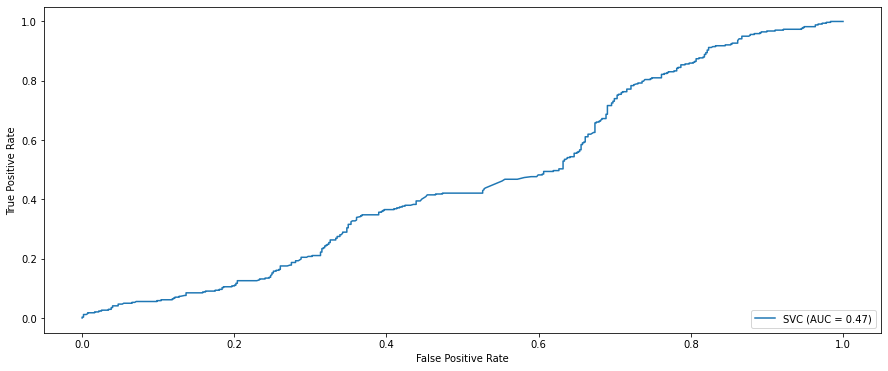

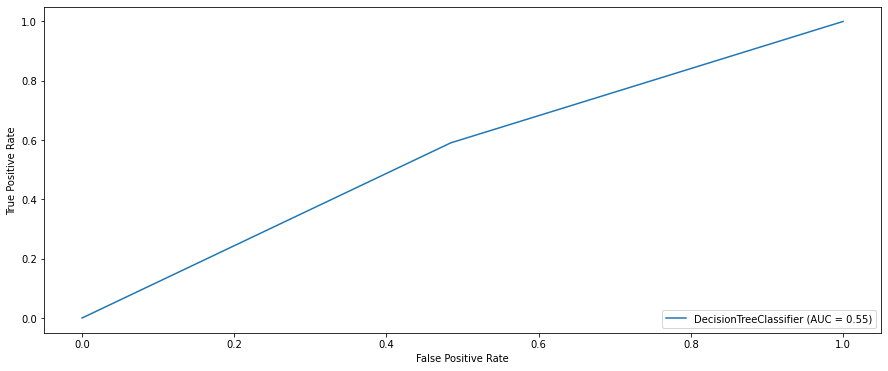

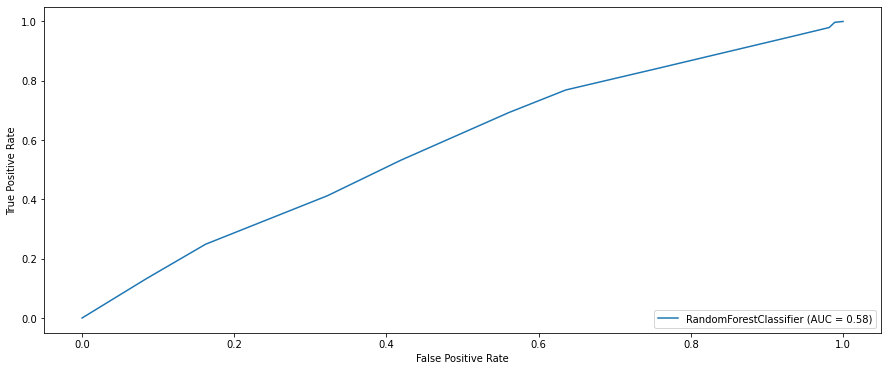

In [47]:
# X, y = read_X_y_from_path(file_path, X_feature_list, target)
dataset = pd.read_csv('../../../../../../Downloads/titanic/train.csv')
dataset = dataset.fillna(dataset.mean())

X = dataset.iloc[:, [2, 5,9]].values
y = dataset.iloc[:, 1].values

dataset.head()
dataset.shape

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# X_test.shape
# y_test.shape

classifier_list = [
    "LogisticRegression",
    "KNeighborsClassifier",
    "naive_bayes",
    "SVC",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
]
for model in classifier_list:
    classifier_model = build_classifier(model)
    metrix_plot(classifier_model, X, y, simple_CM=True, ROC_AUC=True)
    print(metrix_report(y, pred(classifier_model, X)))


# classifier_model = build_classifier('RandomForestClassifier')
# metrix_plot(classifier_model, X_test, y_test, simple_CM=False, ROC_AUC=True, )